Evaluation metric:  

Accuracy is easy to understand and commonly used for multiclass classification.  
Precision: How many predicted activity of a class are correct.  
Recall: How many actual activity are correctly predicted.  
F1-score: harmonic mean of precision and recall.  
Confusion matrix.  

In [ ]:
import pandas as pd

# Read the CSV files
train_df = pd.read_csv("../gender/train.csv")
val_df = pd.read_csv("../gender/val.csv")
test_df = pd.read_csv("../gender/test.csv")

# Define the mapping for M10 activities
m10_merge_dict = {
    "M10_WT0": "M10", "M10_WT1": "M10", "M10_WT2": "M10",
    "M10_WT3": "M10", "M10_WT4": "M10", "M10_WT5": "M10"
}

# Apply the mapping to the "Activity" column
train_df["Activity"] = train_df["Activity"].replace(m10_merge_dict)
val_df["Activity"] = val_df["Activity"].replace(m10_merge_dict)
test_df["Activity"] = test_df["Activity"].replace(m10_merge_dict)

# Save
train_df.to_csv("../gender_merged/train.csv", index=False)
val_df.to_csv("../gender_merged/val.csv", index=False)
test_df.to_csv("../gender_merged/test.csv", index=False)

print("M10 activities merged and files saved.")


-----

Version 1:

In [ ]:
# import pandas as pd
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report

# # Load traina and val data
# train_df = pd.read_csv("../gender/train.csv")
# val_df = pd.read_csv("../gender/val.csv")

# # Set the features and labels
# # drop out the columns which are not features
# exclude_cols = [
#     "Activity", "Subject", "window", "set", "trial_id",
#     "sex", "most_affected_wrist", "most_affected_ankle", "dominant_side",
#     "age", "height_(cm)", "weight_(kg)", "most_affected_side",
#     "hoehn_and_yahr_(stage)", "years_since_diagnosis", "cit", "updrs"
# ]

# feature_cols = [col for col in train_df.columns if col not in exclude_cols]

# X_train = train_df[feature_cols]
# y_train = train_df["Activity"]

# X_val = val_df[feature_cols]
# y_val = val_df["Activity"]

# # Define the model and grid parameters 
# rf_model = RandomForestClassifier(random_state=42)
# param_grid = {
#     "n_estimators": [100, 200, 500],
#     "max_depth": [5, 10, 20],
#     "min_samples_split": [2, 5],
#     "min_samples_leaf": [1, 2]
# }

# # param_grid = {
# #     "n_estimators": [100, 300, 500, 700],
# #     "max_depth": [None, 10, 20, 30, 50],
# #     "min_samples_split": [2, 5, 10],
# #     "min_samples_leaf": [1, 2, 4],
# #     "max_features": ["sqrt", "log2"]  
# # }


# # Grid search （k-fold cross validation）3, 5, 10
# grid_search = GridSearchCV(
#     estimator=rf_model,
#     param_grid=param_grid,
#     cv=3,
#     n_jobs=-1,
#     scoring="accuracy",
#     verbose=2
# )
# grid_search.fit(X_train, y_train)

# # Evaluate the best model
# best_model = grid_search.best_estimator_
# y_val_pred = best_model.predict(X_val)

# # Save the report
# val_report = classification_report(y_val, y_val_pred, output_dict=True)
# report_df = pd.DataFrame(val_report).transpose()
# report_df.to_csv("../gender/val_classification_report2_3fold.csv")

# # print
# print("Best Hyperparameters:", grid_search.best_params_)


---------------

Version 2:  
  
use RandomizedSearchCV first，then use GridSearchCV  

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# from sklearn.metrics import classification_report


# # Load the data
# train_df = pd.read_csv("../gender/train.csv")
# val_df = pd.read_csv("../gender/val.csv")

# # Exclude the columns which are not features
# exclude_cols = [
#     "Activity", "Subject", "window", "set", "trial_id",
#     "sex", "most_affected_wrist", "most_affected_ankle", "dominant_side",
#     "age", "height_(cm)", "weight_(kg)", "most_affected_side",
#     "hoehn_and_yahr_(stage)", "years_since_diagnosis", "cit", "updrs"
# ]

# feature_cols = [col for col in train_df.columns if col not in exclude_cols]

# X_train = train_df[feature_cols]
# y_train = train_df["Activity"]

# X_val = val_df[feature_cols]
# y_val = val_df["Activity"]


In [ ]:
# from pprint import pprint

# # define the range of random grid parameters
# # will not go through every fits, save times in big data
# random_grid = {
#     'n_estimators': np.linspace(100, 1000, 10, dtype=int),
#     'max_depth': [10, 20, 30, 50, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2']
# }

# rf_model = RandomForestClassifier(random_state=42)

# # random search
# rf_random_search = RandomizedSearchCV(
#     estimator=rf_model,
#     param_distributions=random_grid,
#     n_iter=30,  # random search n-times of hyperparams fits
#     cv=3,
#     verbose=2,
#     random_state=42,
#     n_jobs=-1,
#     scoring='accuracy'
# )

# rf_random_search.fit(X_train, y_train)

# # output the best parameters in random search
# print("Random Search Best Parameters:")
# pprint(rf_random_search.best_params_)


In [ ]:
# # slightly tune the results from random  search
# best_params = rf_random_search.best_params_

# # set a narrower range
# # e.g. +-100; +-1 ...
# param_grid2 = {
#     'n_estimators': [950, 1000, 1100],
#     'max_depth':  [5, 10, 15],
#     'min_samples_split': [4, 5, 6],
#     'min_samples_leaf': [2, 3],
#     'max_features': ['log2']
# }

# # handle negative number may occors
# param_grid2['min_samples_split'] = [x for x in param_grid2['min_samples_split'] if x >= 2]

# # apply grid search
# grid_search = GridSearchCV(
#     estimator=rf_model,
#     param_grid=param_grid2,
#     cv=3,
#     n_jobs=-1,
#     verbose=2,
#     scoring='accuracy'
# )

# grid_search.fit(X_train, y_train)

# print("Grid Search Best Parameters:")
# pprint(grid_search.best_params_)


In [ ]:
# # final model
# final_model = grid_search.best_estimator_

# # pred in the val set
# y_val_pred = final_model.predict(X_val)

# # the classification report
# val_report_2 = classification_report(y_val, y_val_pred, output_dict=True)
# report2_df = pd.DataFrame(val_report_2).transpose()
# report2_df.to_csv("../gender/val_classi_report_2_random.csv")

# print("Final model performance on validation set:")
# print(report2_df)



------------

Version 3:  
    
add pipeline，SelectKBest，StandardScaler  

In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

# Load training data
train_df = pd.read_csv("../gender_merged/train.csv")

# Drop out the columns which are not features
exclude_cols = [
    "Activity", "Subject", "window", "set", "trial_id",
    "sex", "most_affected_wrist", "most_affected_ankle", "dominant_side",
    "age", "height_(cm)", "weight_(kg)", "most_affected_side",
    "hoehn_and_yahr_(stage)", "years_since_diagnosis", "cit", "updrs"
]

feature_cols = [col for col in train_df.columns if col not in exclude_cols]

X_train = train_df[feature_cols]
y_train = train_df["Activity"]

# create pipeline
# use standardScaler - standardize all features to mean = 0 and standard deviation = 1
# use SelectKBest to only keep top x features, remove noise features.
pipeline_new = Pipeline([
    ("scaler", StandardScaler()),
    ("feature_selection", SelectKBest(score_func=f_classif)),
    ("classifier", RandomForestClassifier(class_weight="balanced", random_state=42))
])

# Define the grid parameters
param_grid3 = {
    "feature_selection__k": [40, 50, 60, 70], 
    "classifier__n_estimators": [50, 75, 100, 125, 150], 
    "classifier__max_depth": [2, 3],
    "classifier__min_samples_split": [2, 4],
    "classifier__min_samples_leaf": [1, 2],
    "classifier__max_features": ["sqrt", "log2"]
}

# Apply grid searchh
grid_search = GridSearchCV(
    estimator=pipeline_new,
    param_grid=param_grid3,
    cv=3,
    scoring="accuracy",
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# output
print("Best Hyperparameters:")
print(grid_search.best_params_)


Validation Set + Confusion Matrix

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get best model
best_model3 = grid_search.best_estimator_

# Load val set
val_df = pd.read_csv("../gender_merged/val.csv")

# Prepare the validation data
X_val = val_df[feature_cols]
y_val = val_df["Activity"]

# Predict
y_pred = best_model3.predict(X_val)

print("Classification Report:")
print(classification_report(y_val, y_pred))


# Train and val accuracy
train_score = best_model3.score(X_train, y_train)
val_score = best_model3.score(X_val, y_val)

print(f"Training accuracy: {train_score:.4f}")
print(f"Validation accuracy: {val_score:.4f}")

# Confusion Matrix
labels = sorted(y_val.unique())
cm = confusion_matrix(y_val, y_pred, labels=labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Step 7 Confusion Matrix (Validation Set)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


---------------

---------------------

### Step 8: LOSO CV and evaluation

In [ ]:
import pandas as pd
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
train_df = pd.read_csv("../gender_merged/train.csv")
val_df = pd.read_csv("../gender_merged/val.csv")
# Combine train and val data
comb_df = pd.concat([train_df, val_df], ignore_index=True)


# Drop columns which not features
drop_cols = [
    "Activity", "Subject", "window", "set", "trial_id",
    "sex", "most_affected_wrist", "most_affected_ankle", "dominant_side",
    "age", "height_(cm)", "weight_(kg)", "most_affected_side",
    "hoehn_and_yahr_(stage)", "years_since_diagnosis", "cit", "updrs"
]

X = comb_df.drop(columns=drop_cols)
y = comb_df["Activity"]
groups = comb_df["Subject"]  

# Define pipeline with optimal hyperparameters
pipeline_loso = Pipeline([
    ("scaler", StandardScaler()),
    ("feature_selection", SelectKBest(score_func=f_classif, k=70)),
    ("classifier", RandomForestClassifier(
        n_estimators=200,
        max_depth=2,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features="sqrt",
        class_weight="balanced",
        random_state=42
    ))
])

# LOSO CV
logo = LeaveOneGroupOut()
y_true_all, y_pred_all = [], []

for train_idx, val_idx in logo.split(X, y, groups):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    pipeline_loso.fit(X_train, y_train)
    y_pred = pipeline_loso.predict(X_val)

    y_true_all.extend(y_val)
    y_pred_all.extend(y_pred)


Report and Confusion Matrix:

In [ ]:
# evaluation report
print("Classification Report:")
print(classification_report(y_true_all, y_pred_all))

# Confusion Matrix
labels = sorted(y.unique())
cm = confusion_matrix(y_true_all, y_pred_all, labels=labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("LOSO CV Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

- Precision - predict as M10, acturally belong to same activity.  
- Recall - ture belong to M10, and correctly predicted.  
- F1 score - harmonic mean  
- Support - sample size  
  
F1-Score = 2 * (Precision * Recall) / (Precision + Recall)  
F1-Score = (2 * TP) / (2 * TP + FP + FN)  

----------

Feature Importance Plot

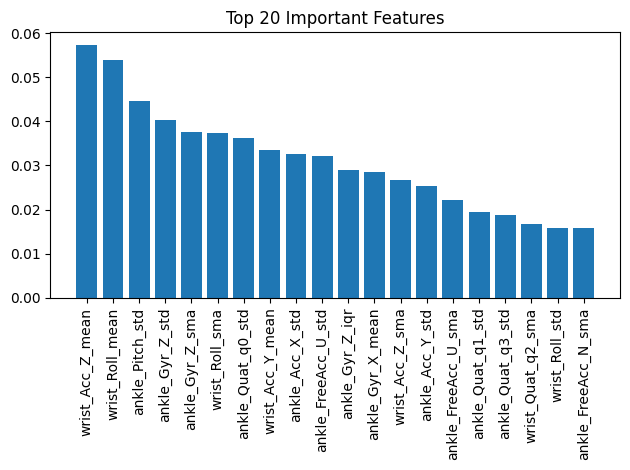

In [ ]:
import matplotlib.pyplot as plt

# Feature importance
best_rf = grid_search.best_estimator_.named_steps["classifier"]
k = grid_search.best_params_["feature_selection__k"]
selected_features = grid_search.best_estimator_.named_steps["feature_selection"].get_support(indices=True)
selected_feature_names = X_train.columns[selected_features]

importances = best_rf.feature_importances_
indices = importances.argsort()[::-1]  # sort from high to low

top_n = 20
top_indices = indices[:top_n]

plt.title(f"Top {top_n} Important Features")
plt.bar(range(top_n), importances[top_indices])
plt.xticks(range(top_n), selected_feature_names[top_indices], rotation=90)
plt.tight_layout()
plt.show()


----------------

Bar plot: f1-score per class (LOSO CV)

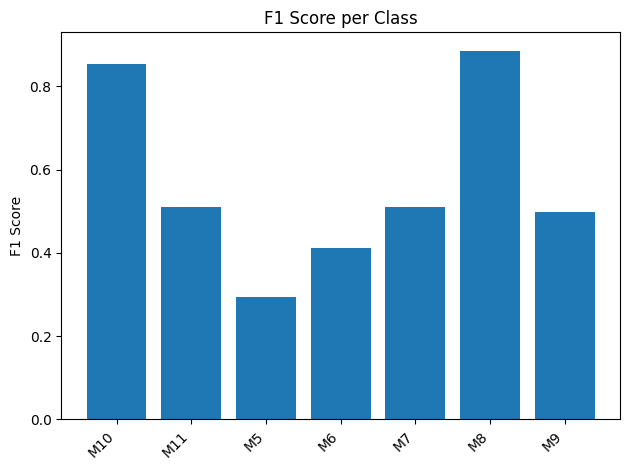

In [10]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

report = classification_report(y_true_all, y_pred_all, output_dict=True)
classes = list(report.keys())[:-3]  # remove accuracy and avg

f1_scores = [report[c]["f1-score"] for c in classes]

plt.bar(classes, f1_scores)
plt.xticks(rotation=45, ha="right")
plt.title("F1 Score per Class")
plt.ylabel("F1 Score")
plt.tight_layout()
plt.show()


Bar plot: recall per class (LOSO CV)

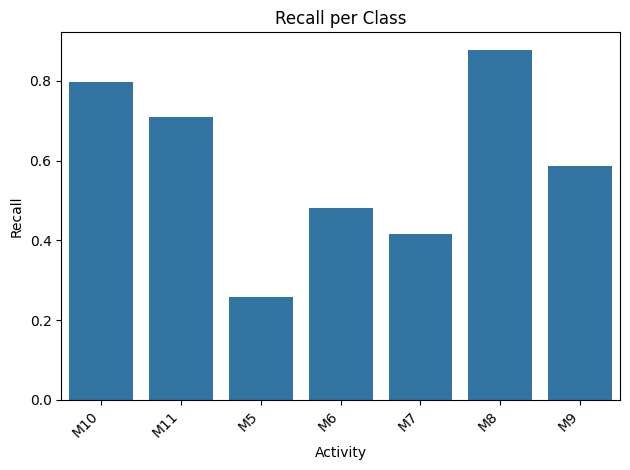

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report

report_df = pd.DataFrame(report).transpose()

classes = [label for label in report_df.index if label not in ('accuracy', 'macro avg', 'weighted avg')]

sns.barplot(x=report_df.loc[classes].index, y=report_df.loc[classes]["recall"])
plt.title("Recall per Class")
plt.ylabel("Recall")
plt.xlabel("Activity")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Bar plot: Precison per class (LOSO CV)

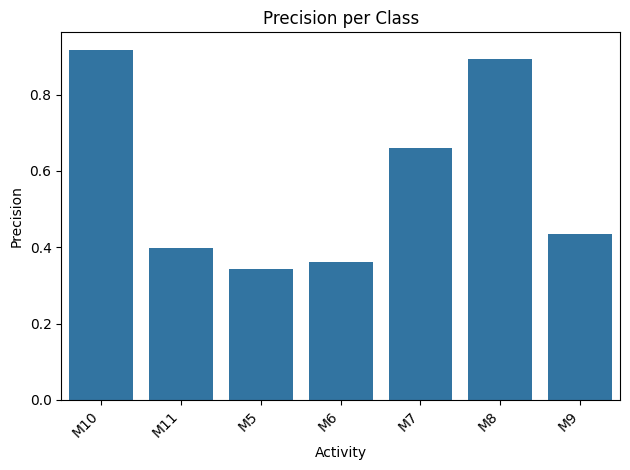

In [12]:
sns.barplot(x=report_df.loc[classes].index, y=report_df.loc[classes]["precision"])
plt.title("Precision per Class")
plt.ylabel("Precision")
plt.xlabel("Activity")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()